In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
image1 = Image.open("cat1.jpeg")
image2 = Image.open("cat2.jpeg").convert('L')

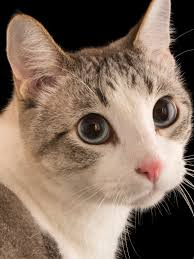

In [ ]:
image1

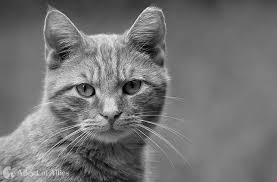

In [ ]:
image2

____

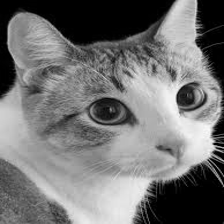

In [ ]:
size = 224
image1.resize((size, size))


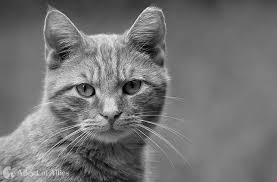

In [ ]:
image2.resize((size, size))


image2

___

In [ ]:
list1 = np.array([i for i in range(1, 10)]).reshape(3,3)

In [ ]:
np.linalg.det(list1)

0.0

____

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from numpy.linalg import svd

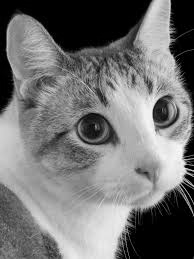

In [ ]:
image1

In [ ]:
image = color.rgb2gray(image1)
image = image / 255.0


U, sigma, VT = svd(image, full_matrices=False)
Sigma = np.diag(sigma)


def reconstruct_image(U, Sigma, VT, k):
    return np.dot(U[:, :k], np.dot(Sigma[:k, :k], VT[:k, :]))

print(U.shape, sigma.shape, VT.shape)

(259, 194) (194,) (194, 194)


In [ ]:
image

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.85103883e-03, 1.88179623e-03, 1.85103883e-03, ...,
        3.26797386e-06, 9.80392157e-06, 3.32698193e-04],
       [1.85103883e-03, 1.85103883e-03, 1.86641753e-03, ...,
        3.26797386e-06, 1.19613995e-04, 6.74297578e-04],
       [1.85103883e-03, 1.80490273e-03, 1.89717493e-03, ...,
        3.26797386e-06, 1.81128797e-04, 7.81948481e-04]])

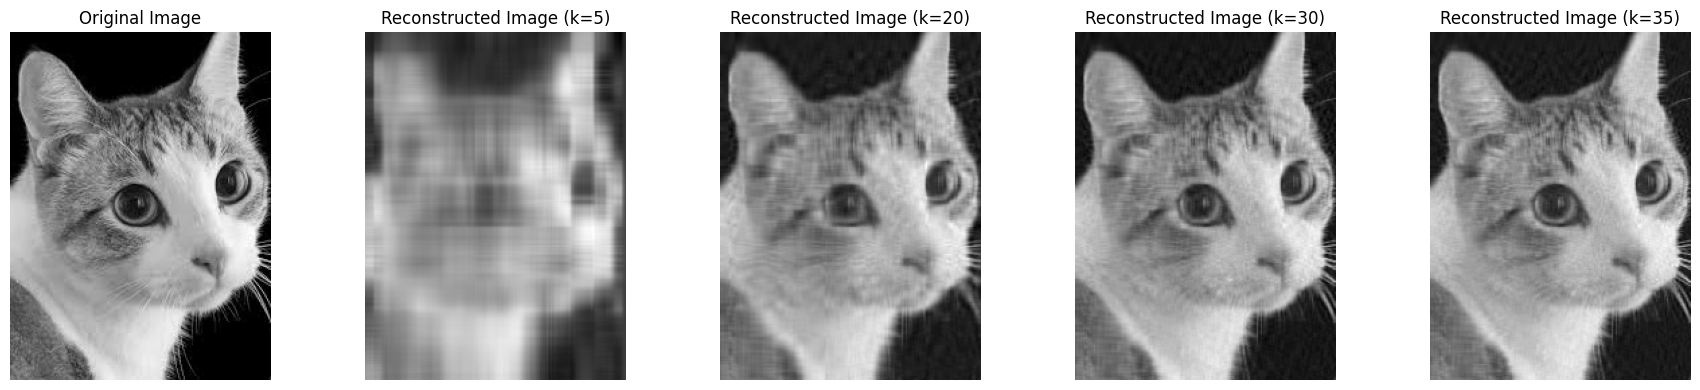

In [ ]:

fig, axes = plt.subplots(1, 5, figsize=(18, 4))


axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')


k_values = [5, 20, 30, 35]

for i, k in enumerate(k_values):
    reconstructed_img = reconstruct_image(U, Sigma, VT, k)
    axes[i + 1].imshow(reconstructed_img, cmap='gray')
    axes[i + 1].set_title(f"Reconstructed Image (k={k})")
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from skimage import io

In [ ]:
image = io.imread('cat1.jpeg') / 255.0


def svd_compress_image(image, k):
    compressed_channels = []

    for i in range(3):
        U, sigma, VT = svd(image[:, :, i], full_matrices=False)
        Sigma = np.diag(sigma)

        compressed_channel = np.dot(U[:, :k], np.dot(Sigma[:k, :k], VT[:k, :]))
        compressed_channels.append(compressed_channel)

    return np.stack(compressed_channels, axis=2)

def compression_ratio(image, k):
    original_size = np.prod(image.shape)
    compressed_size = k * (image.shape[0] + image.shape[1] + 1) * 3
    return compressed_size / original_size

Compression ratio: 0.0904


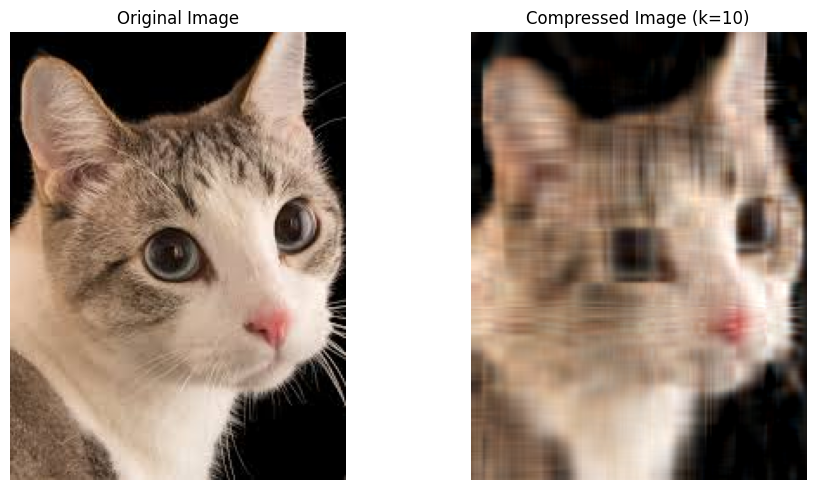

In [ ]:
k = 50

compressed_image = svd_compress_image(image, k)

ratio = compression_ratio(image, k)
print(f"Compression ratio: {ratio:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(compressed_image)
axes[1].set_title(f'Compressed Image (k={k})')
axes[1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
np.array(Image.open("cat1.jpeg")) / 255.0

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.56470588, 0.45490196, 0.36862745],
        [0.57254902, 0.4627451 , 0.37647059],
        [0.56470588, 0

____

In [ ]:
import pandas as pd

In [ ]:
heart = pd.read_csv("heart.csv")
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
heart.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
heart.sample(7)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes
89,51,0,nonanginal,130,256,0,2,149,0,0.5,1,0.0,normal,No
113,43,0,asymptomatic,132,341,1,2,136,1,3.0,2,0.0,reversable,Yes
141,59,1,typical,170,288,0,2,159,0,0.2,2,0.0,reversable,Yes
135,55,0,nontypical,135,250,0,2,161,0,1.4,2,0.0,normal,No
186,42,1,nonanginal,120,240,1,0,194,0,0.8,3,0.0,reversable,No
253,51,0,nonanginal,120,295,0,2,157,0,0.6,1,0.0,normal,No


In [ ]:
heart.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [ ]:
heart.describe(include="object")

,ChestPain,Thal,AHD
count,303,301,303
unique,4,3,2
top,asymptomatic,normal,No
freq,144,166,164


In [ ]:
heart.ChestPain.value_counts()

,count
ChestPain,
0,143
1,84
2,49
3,23


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
heart.ChestPain = le.fit_transform(heart.ChestPain)

In [ ]:
heart.Thal.value_counts()

,count
Thal,
1,164
2,115
0,18
3,2


In [ ]:
le = LabelEncoder()
heart.Thal = le.fit_transform(heart.Thal)

In [ ]:
heart.AHD.value_counts()

,count
AHD,
No,164
Yes,139


In [ ]:
heart.AHD = pd.get_dummies(heart.AHD, drop_first=True).astype(int)

In [ ]:
heart.isnull().sum()

,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0
Oldpeak,0


In [ ]:
heart.dropna(inplace=True)

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        299 non-null    int64  
 1   Sex        299 non-null    int64  
 2   ChestPain  299 non-null    int64  
 3   RestBP     299 non-null    int64  
 4   Chol       299 non-null    int64  
 5   Fbs        299 non-null    int64  
 6   RestECG    299 non-null    int64  
 7   MaxHR      299 non-null    int64  
 8   ExAng      299 non-null    int64  
 9   Oldpeak    299 non-null    float64
 10  Slope      299 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       299 non-null    int64  
 13  AHD        299 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 35.0 KB


In [ ]:
# heart.drop("AHD", axis=1, inplace=True)

corr = heart.corr()
corr.style.background_gradient(cmap='coolwarm',)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
Age,1.000000,-0.091813,-0.109576,0.290696,0.203377,0.128676,0.149749,-0.392342,0.095108,0.197376,0.158960,0.362605,0.056293
Sex,-0.091813,1.000000,-0.011682,-0.065521,-0.195907,0.045862,0.026436,-0.052064,0.149038,0.110237,0.039337,0.093185,0.200330
ChestPain,-0.109576,-0.011682,1.000000,0.037419,-0.069760,0.049729,-0.060109,0.335863,-0.379998,-0.203062,-0.152960,-0.233214,-0.190786
RestBP,0.290696,-0.065521,0.037419,1.000000,0.132284,0.177623,0.148709,-0.048053,0.065885,0.191615,0.121108,0.098773,0.055205
Chol,0.203377,-0.195907,-0.069760,0.132284,1.000000,0.006664,0.164958,0.002179,0.056388,0.040431,-0.009008,0.119000,0.064528
Fbs,0.128676,0.045862,0.049729,0.177623,0.006664,1.000000,0.058426,-0.003387,0.011637,0.009093,0.053777,0.145478,0.002165
RestECG,0.149749,0.026436,-0.060109,0.148709,0.164958,0.058426,1.000000,-0.077798,0.074084,0.110275,0.128907,0.128343,-0.014993
MaxHR,-0.392342,-0.052064,0.335863,-0.048053,0.002179,-0.003387,-0.077798,1.000000,-0.376359,-0.341262,-0.381348,-0.264246,-0.120829
ExAng,0.095108,0.149038,-0.379998,0.065885,0.056388,0.011637,0.074084,-0.376359,1.000000,0.289573,0.254302,0.145570,0.225189
Oldpeak,0.197376,0.110237,-0.203062,0.191615,0.040431,0.009093,0.110275,-0.341262,0.289573,1.000000,0.579775,0.295832,0.198187


In [ ]:
from skimage.util import random_noise
from skimage import io, img_as_float


image = Image.open('/content/cat1.jpeg')
image = np.array(image)

def add_gaussian_noise(image, mean=0, var=0.01):
    noisy_image = random_noise(image, mode='gaussian', mean=mean, var=var)
    return noisy_image

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[144, 116,  94],
        [146, 118,  96],
        [144, 116,  94],
        ...,
        [  1,   0,   0],
        [  3,   0,   0],
        [ 25,  21,  18]],

       [[144, 116,  94],
        [144, 116,  94],
        [145, 117,  95],
        ...,
        [  1,   0,   0],
        [ 11,   7,   6],
        [ 48,  43,  40]],

       [[144, 116,  94],
        [141, 113,  91],
        [147, 119,  97],
        ...,
        [  1,   0,   0],
        [ 15,  11,  10],
        [ 55,  50,  47]]], dtype=uint8)
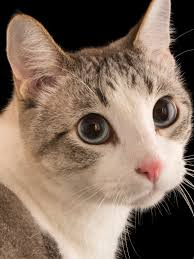

In [ ]:
image

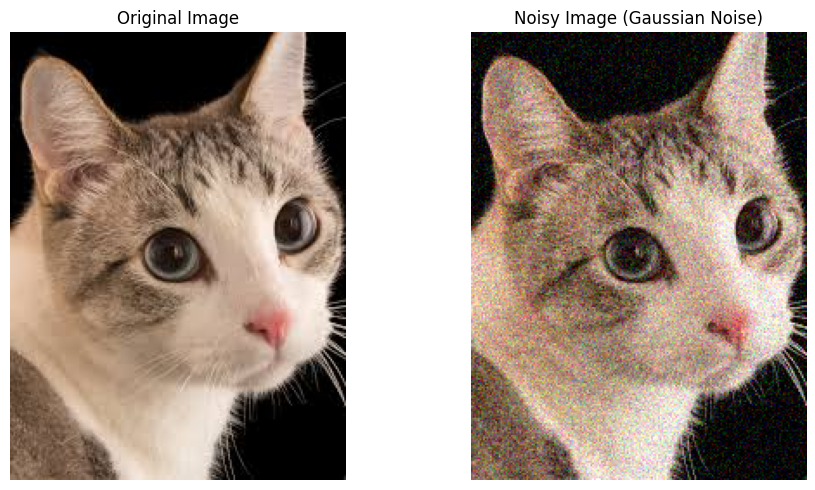

In [ ]:
noisy_image = add_gaussian_noise(image, mean=2, var=0.1)


fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(noisy_image)
axes[1].set_title('Noisy Image (Gaussian Noise)')
axes[1].axis('off')

plt.tight_layout()
plt.show()